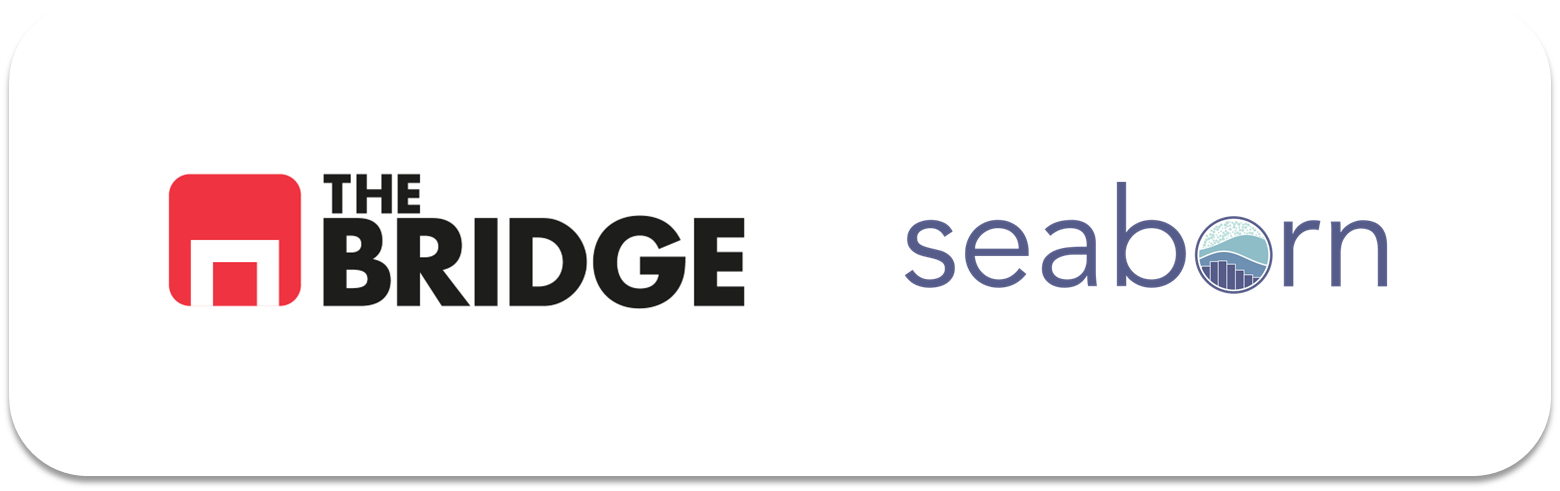

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [19]:
df = pd.read_csv("./california_cities.csv")
df.info()
df = df.dropna() #me deshice de todos los nulos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [121]:
def pinta_diagrama_dispersion(
    df: pd.DataFrame, # 1. Un dataframe
    num_col_x: str,   # 2. Una columna numérica del dataframe para el eje X
    num_col_y: str,   # 3. Una columna numérica del dataframe para el eje Y
    cat_col: str = None, # 4. Una columna categórica (opcional, valor por defecto None)
    size: 'str | float | int' = 50, # 5. Tamaño de los puntos o una cadena que sea una columna
    scale: float = 1, # 6. Escala para modificar el tamaño si el argumento size es una columna
    legend: bool = True # EXTRA: Controla si se pinta una leyenda para colores y tamaños
):
 
    # Configuración del tamaño de los puntos
    if isinstance(size, str):
        sizes = df[size] * scale
    else:
        sizes = size

    # Creación del scatter plot
    plt.figure(figsize=(10, 6))
    if cat_col:
        # 7. Pintar con colores según una columna categórica
        scatter = sns.scatterplot(
            data=df, x=num_col_x, y=num_col_y, hue=cat_col, size=sizes, sizes=(20, 200), legend=legend
        )
    else:
        # 8. Sin columna categórica, no se pasa el color
        scatter = sns.scatterplot(
            data=df, x=num_col_x, y=num_col_y, size=sizes, sizes=(20, 200), legend=legend
        )

    # Configuraciones finales del gráfico
    plt.title("Diagrama de dispersión")
    plt.xlabel(num_col_x)
    plt.ylabel(num_col_y)
    if legend and cat_col:
        plt.legend(title=cat_col)
    elif legend:
        plt.colorbar(scatter)
    
    plt.show()




### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

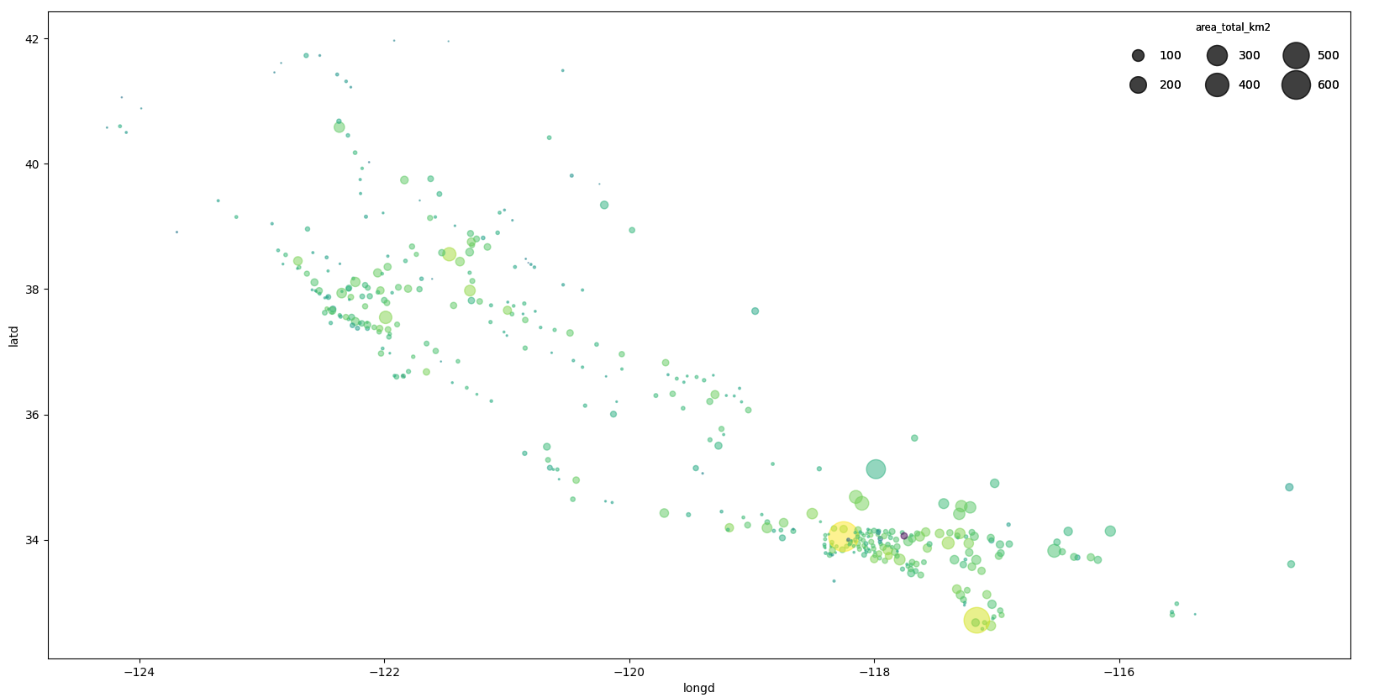

In [126]:
# Creo la nueva columna log_poblacion con el logaritmo decimal de population_total
df['log_poblacion'] = np.log10(df['population_total'])

In [128]:
df.columns

Index(['Unnamed: 0', 'city', 'latd', 'longd', 'elevation_m', 'elevation_ft',
       'population_total', 'area_total_sq_mi', 'area_land_sq_mi',
       'area_water_sq_mi', 'area_total_km2', 'area_land_km2', 'area_water_km2',
       'area_water_percent', 'log_poblacion'],
      dtype='object')

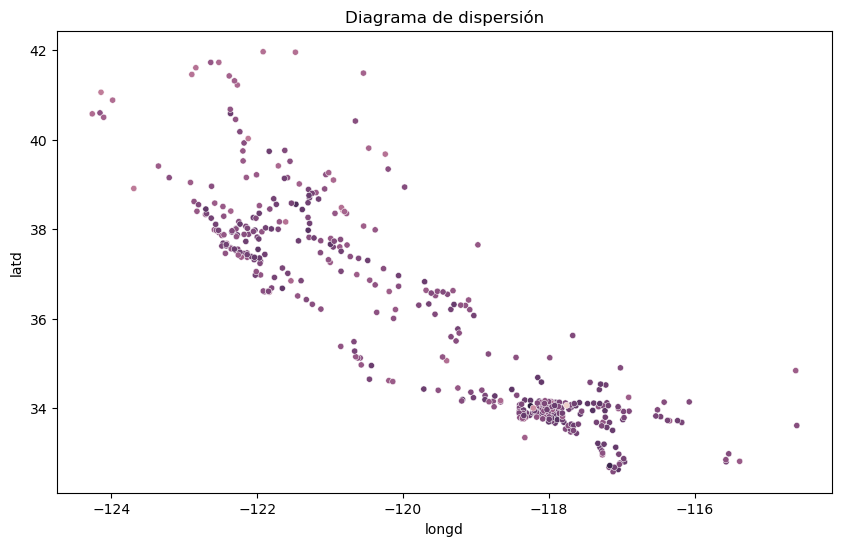

In [130]:
pinta_diagrama_dispersion(df,'longd','latd','log_poblacion', 'area_land_km2', 'scale' == 0.5,'legend' == True)

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [36]:
df_titanic= pd.read_csv("./titanic.csv")

In [38]:
df_titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

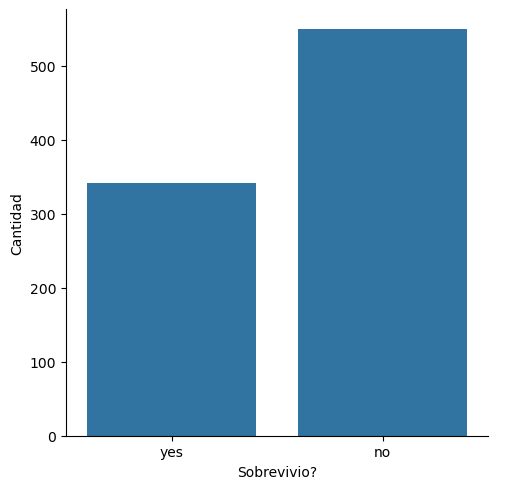

In [92]:
#1
figura_1 = sns.catplot(x = 'alive',
            kind = 'count',
            orient = 'V',
            data = df_titanic.sort_values("who"))
figura_1.set_axis_labels("Sobrevivio?", "Cantidad");

Elijo no diferenciar con colores para no desviar la atencion del mensaje que quiero transmitir: la tasa de mortalidad fue elevada. No importa si eran hombres o mujeres

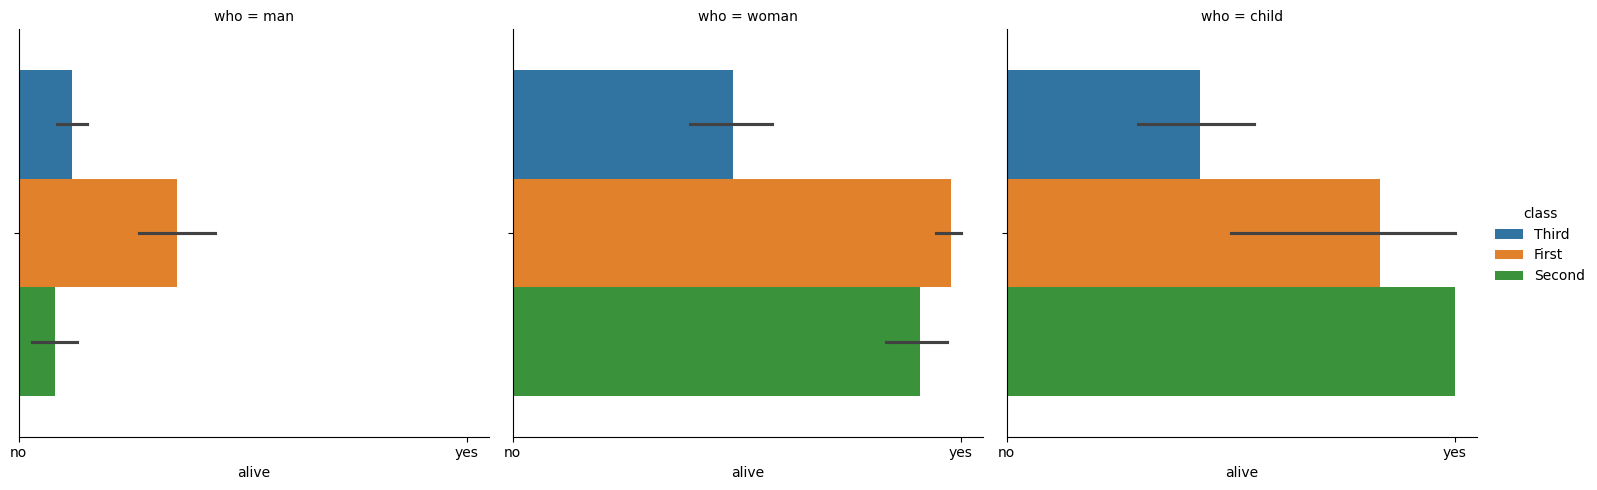

In [94]:
#2
sns.catplot (x = "alive", col = "who", hue = "class", data= df_titanic, kind = 'bar');

Se observa con claridad que, si bien mujeres y niños son los que más sobrevivieron en comparación con los hombres, luego dentro de mujeres y niños que sobrevivieron se observa que:
- niños que viajaban en 2da clase tuvieron mayor proporción de sobrevivientes, seguida por la 1ra clase.
- mujeres que viajaban en 1ra clase tuvieron mayor proporción de sobrevivientes.

<Figure size 1000x1000 with 0 Axes>

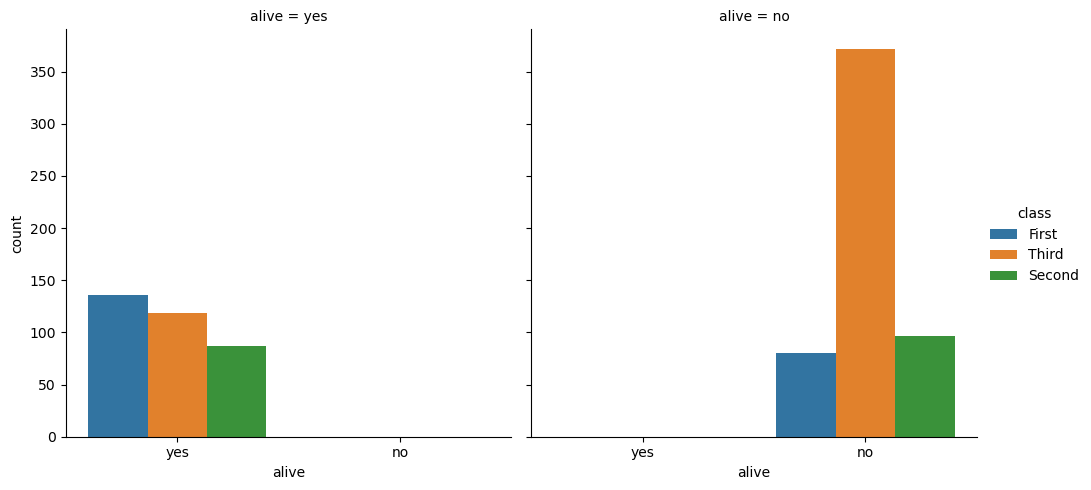

In [113]:
#3 
plt.figure(figsize = (10,10))
sns.catplot(x = 'alive',
            col = 'alive',
            kind = 'count',
            hue = 'class',
            orient = 'V',
            data = df_titanic.sort_values("who"))

Entonces la clase en la que se viajaba tenia mucho que ver.

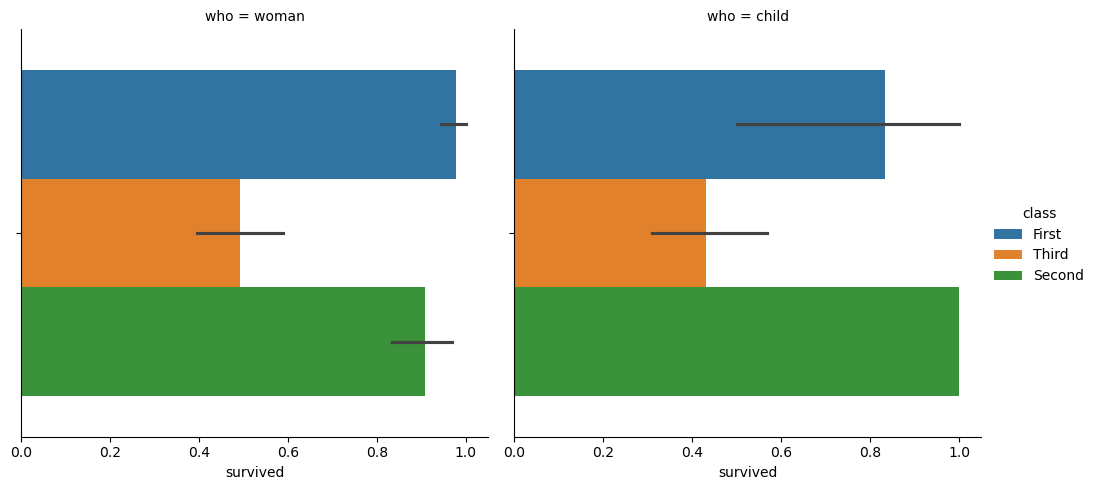

In [110]:
#Creo un filtro para que who solo muestre woman y child
filtered_df = df_titanic[df_titanic['who'].isin(['woman', 'child'])]

sns.catplot (x = "survived", col = "who", hue = "class", data= filtered_df, kind = 'bar')

La clase en la que viajaban explica las diferencias de tasas de supervivencia entre mujeres y niños.

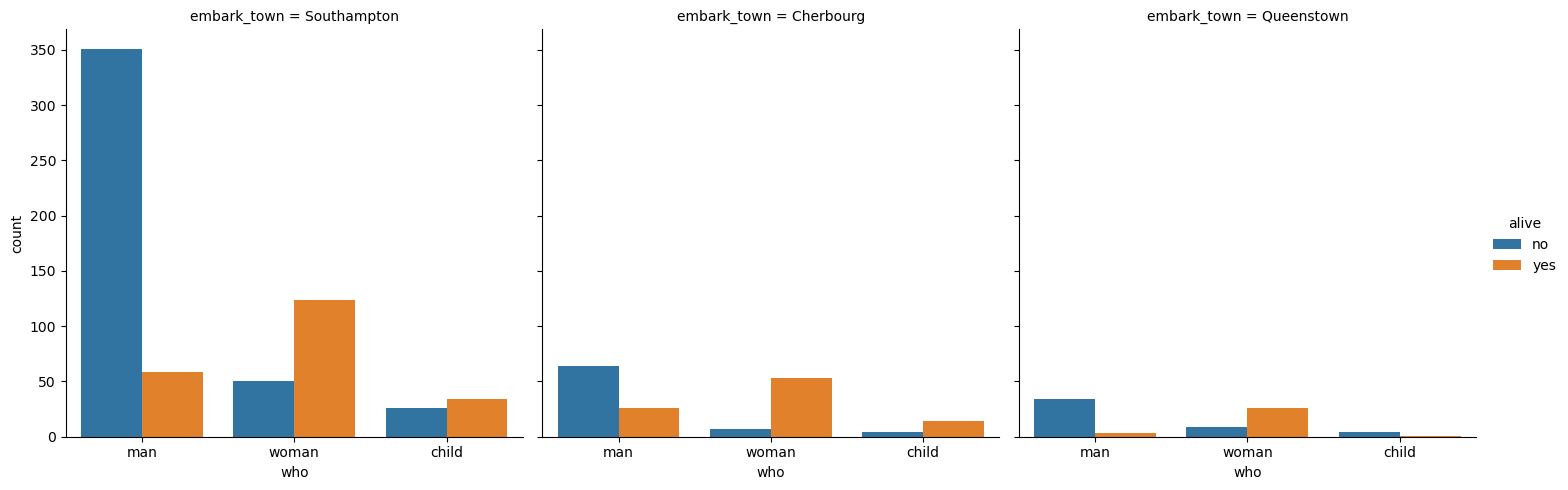

In [90]:
sns.catplot (x = "who", col = "embark_town", hue = "alive", data= df_titanic, kind = 'count')